In [70]:
import h5py
import pylab as mplot
import numpy as np
import healpy as hp
import skyproj
import treecorr

In [71]:
with h5py.File('/home/p/pai/DATA/PSF/LSSTCam_DRP_PSF_catalog.h5','r') as f:
    print(f['data'].keys())  
    visit = f['data/visit'][:]
    ra = f['data/ra'][:]
    dec = f['data/dec'][:]
    T = f['data/T'][:]
    air_temp = f['data/air_temp'][:]
    airmass = f['data/airmass'][:]
    band = f['data/band'][:]
    date = f['data/date'][:]
    det_is_e2v = f['data/det_type_e2v'][:]
    det_is_itl = f['data/det_is_itl'][:]
    detector = f['data/detector'][:]
    e1 = f['data/e1'][:]
    e2 = f['data/e2'][:]
    model_e1 = f['data/model_e1'][:]
    model_e2 = f['data/model_e2'][:]
    model_T = f['data/model_T'][:]
    model_flux = f['data/model_flux']
    model_flux_err = f['data/model_flux_err']
    fp_x = f['data/fp_x'][:]
    fp_y = f['data/fp_y'][:]
    humidity = f['data/humidity'][:]
    mjd = f['data/mjd'][:]
    pressure = f['data/pressure'][:]
    psf_reserved = f['data/psf_reserved'][:]
    psf_used = f['data/psf_used'][:]
    slot_px_x = f['data/slot_px_x'][:]
    slot_px_y = f['data/slot_px_y'][:]
    source_id = f['data/source_id'][:]
    wind_dir = f['data/wind_dir'][:]
    wind_speed = f['data/wind_speed'][:]
    seeing = f['data/seeing'][:]



<KeysViewHDF5 ['T', 'air_temp', 'airmass', 'band', 'date', 'dec', 'det_is_itl', 'det_type_e2v', 'detector', 'e1', 'e2', 'fp_x', 'fp_y', 'humidity', 'mjd', 'model_T', 'model_e1', 'model_e2', 'model_flux', 'model_flux_err', 'pressure', 'psf_reserved', 'psf_used', 'ra', 'seeing', 'slot_px_x', 'slot_px_y', 'source_id', 'visit', 'wind_dir', 'wind_speed']>


In [72]:
de1 = e1-model_e1
de2 = e2-model_e2
dT = T-model_T

In [3]:
mask = np.isnan(dec)
print(dec[mask])

[]


In [4]:
nside = 1024
theta = (90 - dec)/180*np.pi
phi = ra/180*np.pi
ids = hp.ang2pix(nside, theta, phi)

In [60]:
band

array([b'i', b'i', b'i', ..., b'g', b'g', b'g'], dtype='|S1')

In [64]:
mask_band = [(band==b'u'), (band==b'g'), (band==b'r'), (band==b'i'), (band==b'z'), (band==b'y')]
B = ['u','g','r','i','z','y']

In [5]:
pixel_counts = np.bincount(ids, minlength = hp.nside2npix(nside))

/tmp/ipykernel_749/1612268073.py:1: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(pixel_counts))


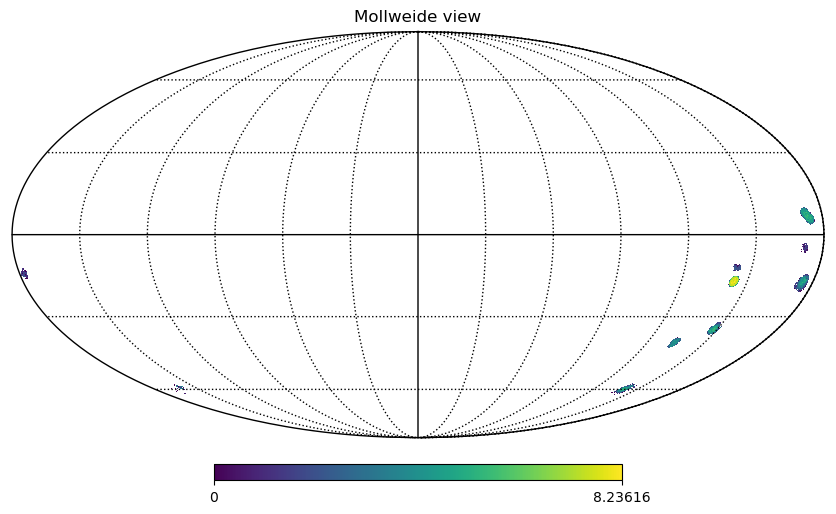

In [6]:
hp.mollview(np.log(pixel_counts))
hp.graticule()

<>:16: SyntaxWarning: invalid escape sequence '\;'
<>:16: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_11048/2754979905.py:16: SyntaxWarning: invalid escape sequence '\;'
  sp.ax.set_xlabel("$\\rm Right \; Ascension$", fontsize=10)


11.802566885782033


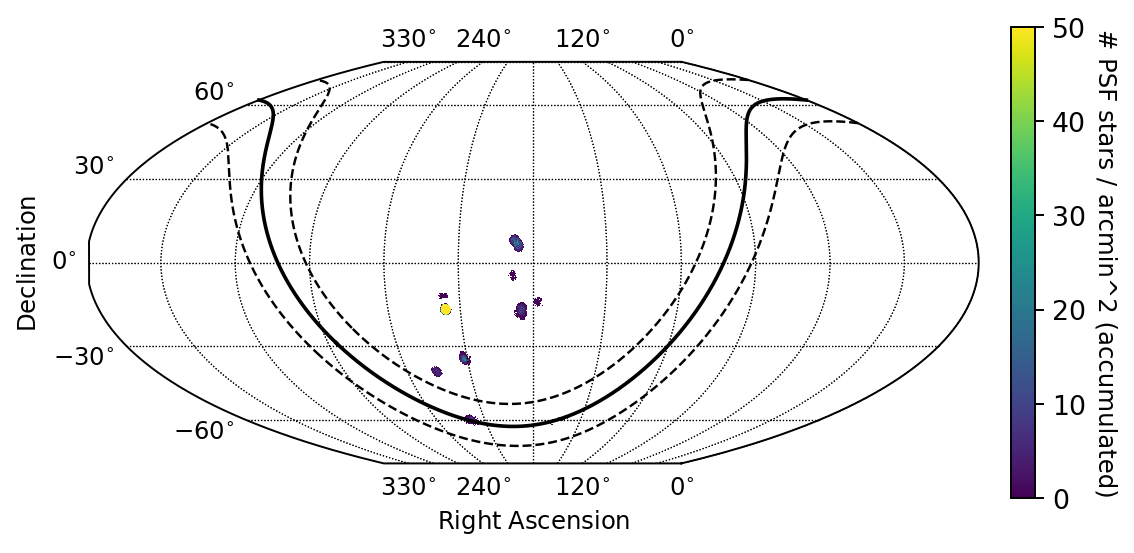

In [22]:
fig = mplot.figure(figsize=(8, 3.5), dpi=175)
fig.clf()

pixarea_arcmin = 4*np.pi*(180/np.pi)**2/hp.nside2npix(nside)*60*60
print(pixarea_arcmin)

map_pixel_counts = pixel_counts.copy()*1.0
map_pixel_counts[map_pixel_counts!=0] /= pixarea_arcmin
map_pixel_counts[map_pixel_counts==0] = hp.UNSEEN

ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(lon_0=180, ax=ax)
# Note that the default is to zoom in to the range defined by the map
sp.draw_hpxmap(map_pixel_counts, zoom=False, vmin=0, vmax=50)
sp.draw_milky_way(width=10)
sp.ax.set_xlabel("$\\rm Right \; Ascension$", fontsize=10)
sp.ax.set_ylabel("$\\rm Declination$", fontsize=10)

cbar = sp.draw_colorbar(pad = 0.03)
cbar.set_label("# PSF stars / arcmin^2 (accumulated)", rotation=270, labelpad=13)

<>:21: SyntaxWarning: invalid escape sequence '\;'
<>:21: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_749/2697277009.py:21: SyntaxWarning: invalid escape sequence '\;'
  sp.ax.set_xlabel("$\\rm Right \; Ascension$", fontsize=8)


11.802566885782033
11.802566885782033
11.802566885782033
11.802566885782033
11.802566885782033
11.802566885782033


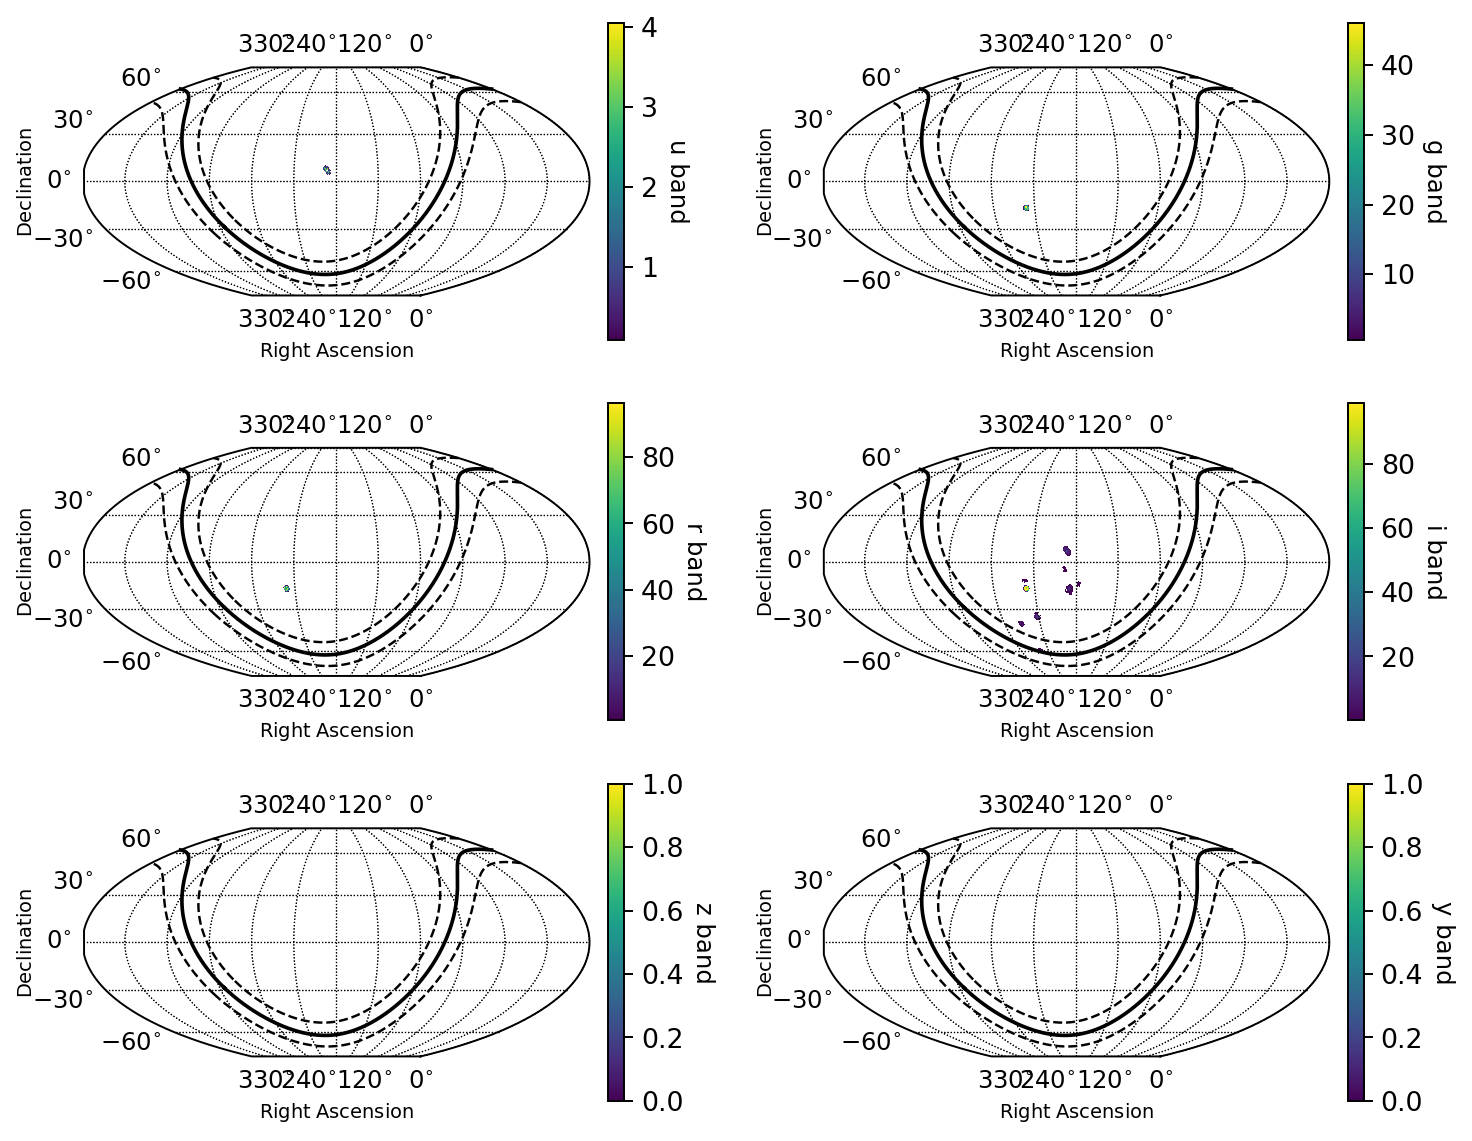

In [69]:
fig = mplot.figure(figsize=(10, 8), dpi=175)
fig.clf()

for i in range(6):
    pixel_counts = np.bincount(ids[mask_band[i]], minlength = hp.nside2npix(nside))
    
    
    
    pixarea_arcmin = 4*np.pi*(180/np.pi)**2/hp.nside2npix(nside)*60*60
    print(pixarea_arcmin)
    
    map_pixel_counts = pixel_counts.copy()*1.0
    map_pixel_counts[map_pixel_counts!=0] /= pixarea_arcmin
    map_pixel_counts[map_pixel_counts==0] = hp.UNSEEN
    
    ax = fig.add_subplot(3,2,i+1)
    sp = skyproj.McBrydeSkyproj(lon_0=180, ax=ax)
    # Note that the default is to zoom in to the range defined by the map
    sp.draw_hpxmap(map_pixel_counts, zoom=False)
    sp.draw_milky_way(width=10)
    sp.ax.set_xlabel("$\\rm Right \; Ascension$", fontsize=8)
    sp.ax.set_ylabel("$\\rm Declination$", fontsize=8)
    
    cbar = sp.draw_colorbar(pad = 0.03)
    cbar.set_label(B[i]+" band", rotation=270, labelpad=13)

In [8]:
X = [wind_speed, air_temp, airmass, humidity, seeing, pressure]
XX = ['wind_speed', 'air_temp', 'airmass', 'humidity', 'seeing', 'pressure']


In [50]:
def average_binned(x, y):
    no_nan = (~np.isnan(x))*(~np.isnan(y))
    x = x[no_nan]
    y = y[no_nan]
    min = np.min(x)
    max = np.max(x)
    X = []
    Y = []
    Yerr = []
    for j in range(21):
        bin_min = min + (max-min)/21*j
        bin_max = min + (max-min)/21*(j+1)
        mask = (x>=bin_min)*(x<bin_max)
        X.append(np.mean(x[mask]))
        Y.append(np.mean(y[mask]))
        Yerr.append(np.std(y[mask])/np.sqrt(len(y[mask])))
    return X, Y, Yerr
        

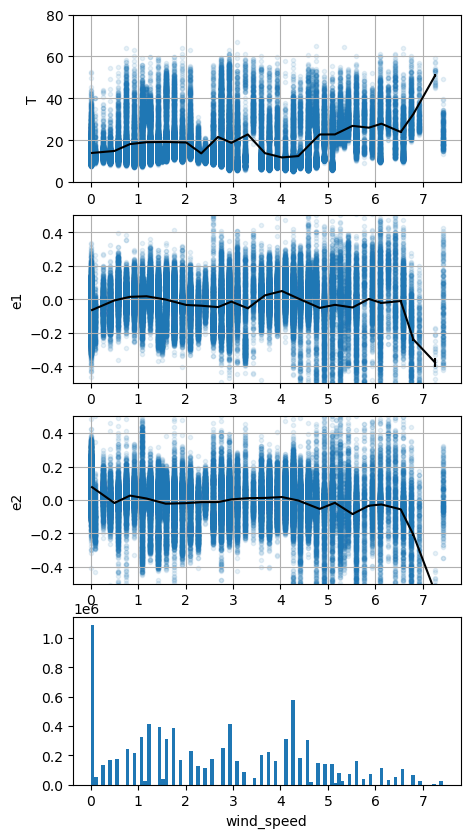

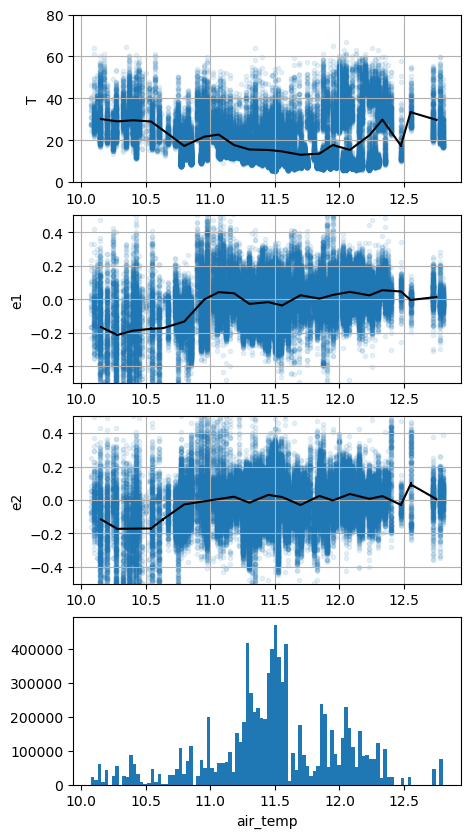

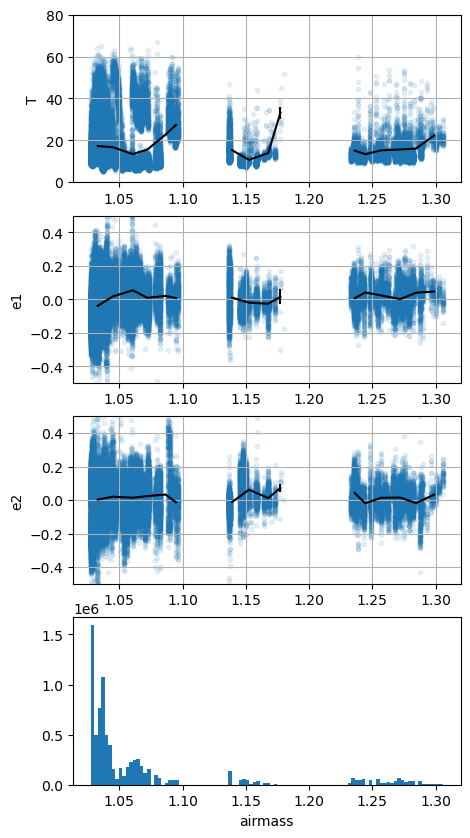

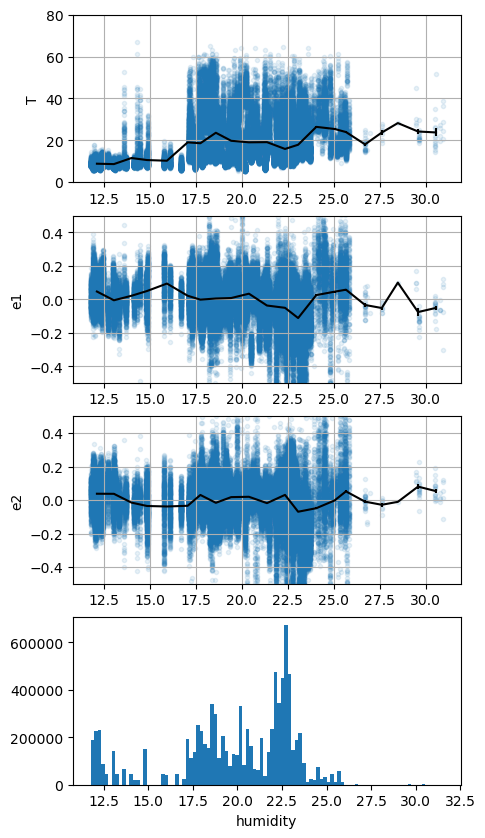

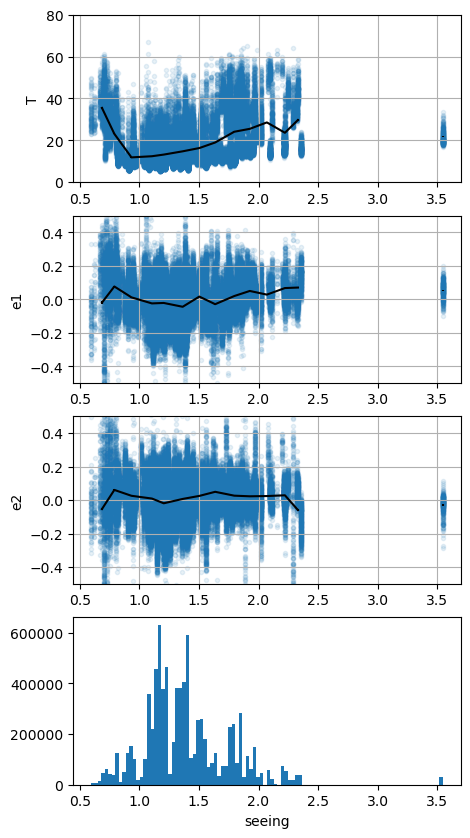

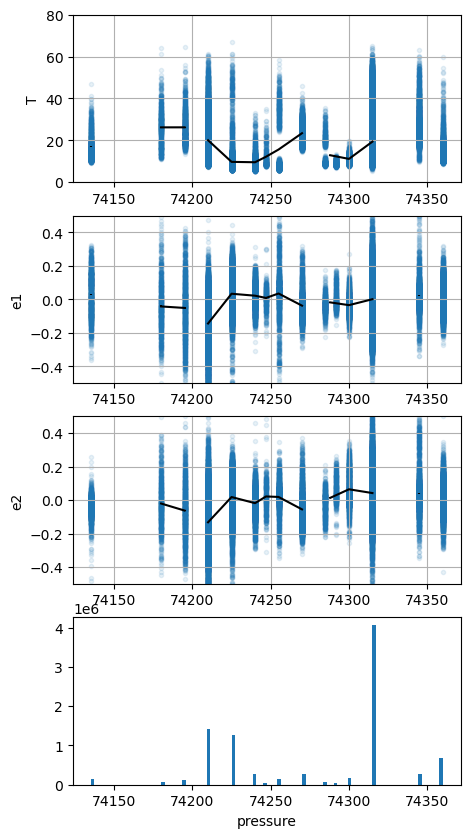

In [54]:

for i in range(6):

    mplot.figure(figsize=(5,10))

    x1, y1, yerr1 = average_binned(X[i][::100], T[::100])
    x2, y2, yerr2 = average_binned(X[i][::100], e1[::100])
    x3, y3, yerr3 = average_binned(X[i][::100], e2[::100])

    mplot.subplot(411)
    mplot.scatter(X[i][::100], T[::100], marker='.',alpha=0.1)
    mplot.errorbar(x1, y1, yerr1, color='k')
    mplot.grid()
    mplot.ylim(0,80)
    mplot.ylabel('T')
    
    mplot.subplot(412)
    mplot.scatter(X[i][::100], e1[::100], marker='.',alpha=0.1)
    mplot.errorbar(x2, y2, yerr2, color='k')
    mplot.grid()
    mplot.ylim(-0.5,0.5)
    mplot.ylabel('e1')
    
    mplot.subplot(413)
    mplot.scatter(X[i][::100], e2[::100], marker='.',alpha=0.1)
    mplot.errorbar(x3, y3, yerr3, color='k')
    mplot.grid()
    mplot.ylim(-0.5,0.5)
    mplot.ylabel('e2')
    
    mplot.subplot(414)
    mplot.hist(X[i], bins=100)
    mplot.xlabel(XX[i])


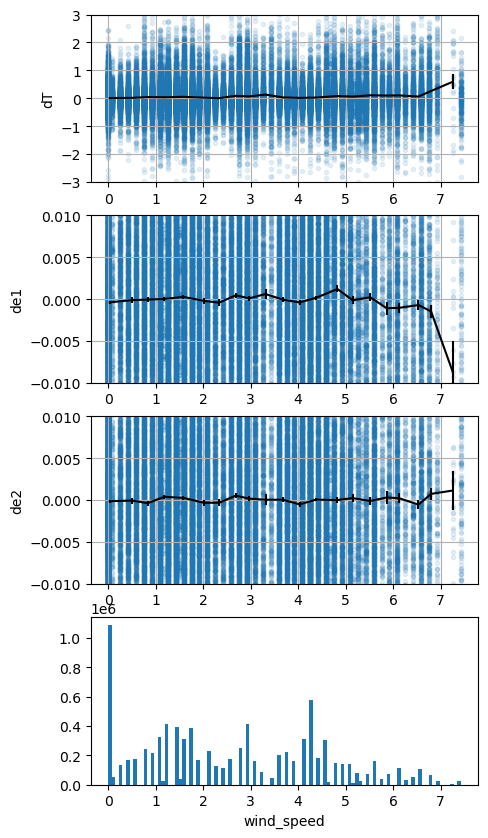

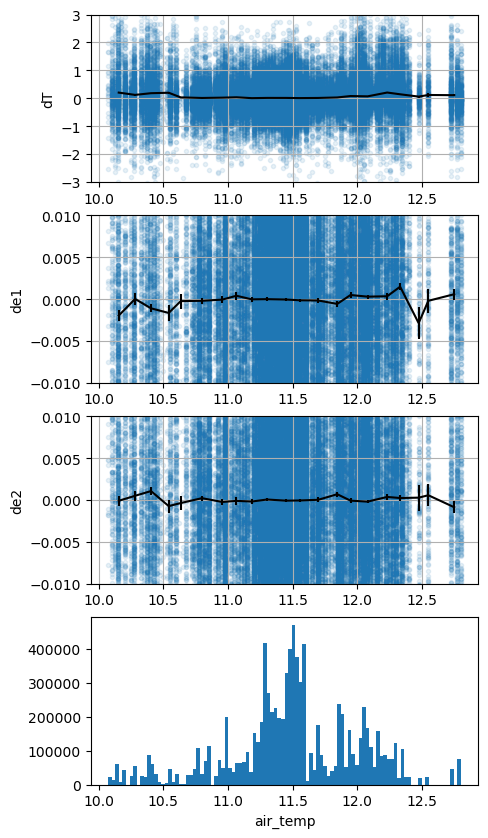

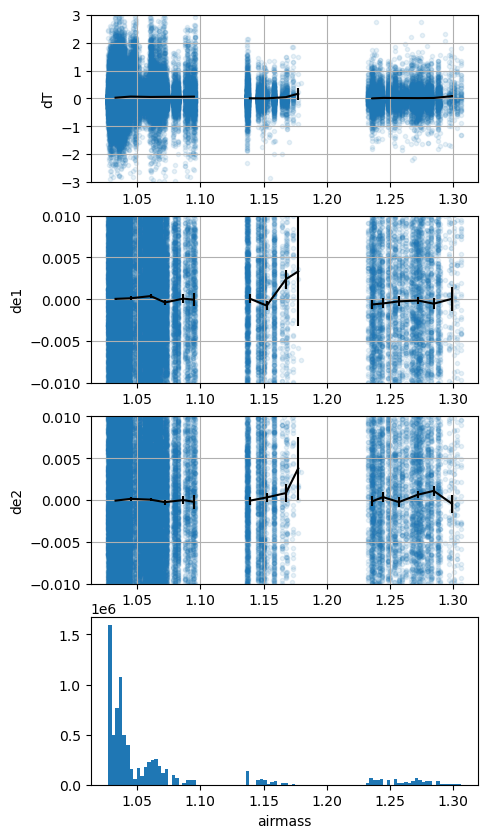

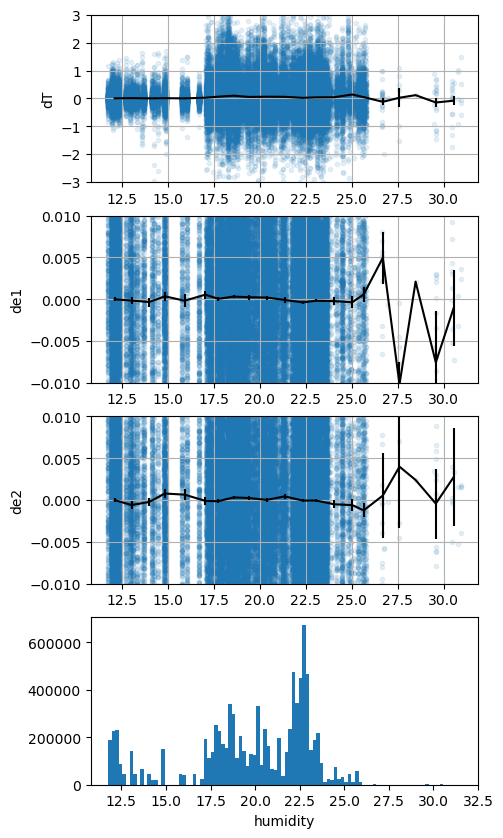

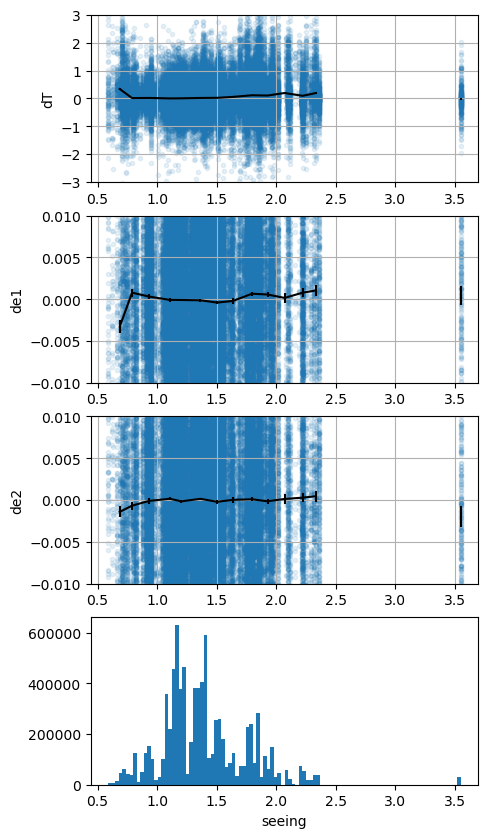

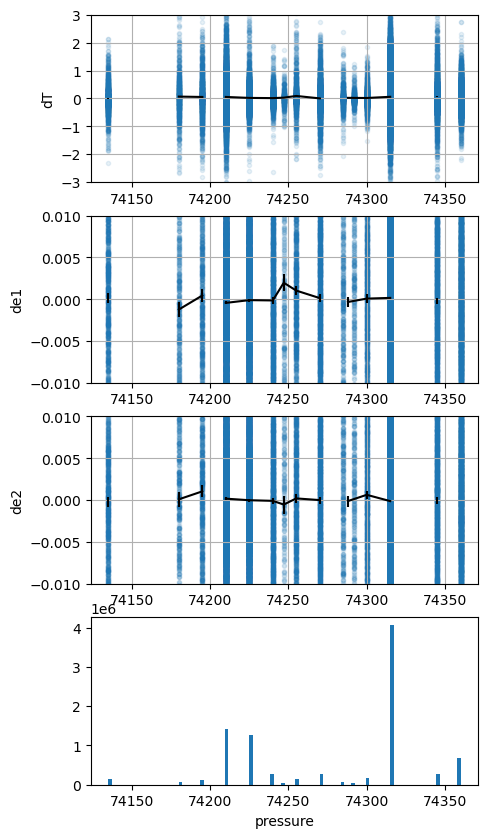

In [53]:
for i in range(6):

    mplot.figure(figsize=(5,10))

    x1, y1, yerr1 = average_binned(X[i][::100], dT[::100])
    x2, y2, yerr2 = average_binned(X[i][::100], de1[::100])
    x3, y3, yerr3 = average_binned(X[i][::100], de2[::100])

    mplot.subplot(411)
    mplot.scatter(X[i][::100], dT[::100], marker='.',alpha=0.1)
    mplot.errorbar(x1, y1, yerr1, color='k')
    mplot.grid()
    mplot.ylim(-3,3)
    mplot.ylabel('dT')
    
    mplot.subplot(412)
    mplot.scatter(X[i][::100], de1[::100], marker='.',alpha=0.1)
    mplot.errorbar(x2, y2, yerr2, color='k')
    mplot.grid()
    mplot.ylim(-0.01,0.01)
    mplot.ylabel('de1')
    
    mplot.subplot(413)
    mplot.scatter(X[i][::100], de2[::100], marker='.',alpha=0.1)
    mplot.errorbar(x3, y3, yerr3, color='k')
    mplot.grid()
    mplot.ylim(-0.01,0.01)
    mplot.ylabel('de2')
    
    mplot.subplot(414)
    mplot.hist(X[i], bins=100)
    mplot.xlabel(XX[i])


Text(0.5, 0, 'dT')

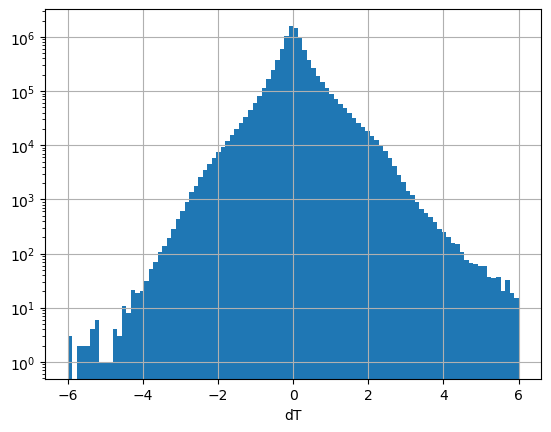

In [28]:
mplot.hist(dT, range=(-6,6), bins=100)
mplot.grid()
mplot.yscale('log')
mplot.xlabel('dT')

Text(0.5, 0, 'dT/T')

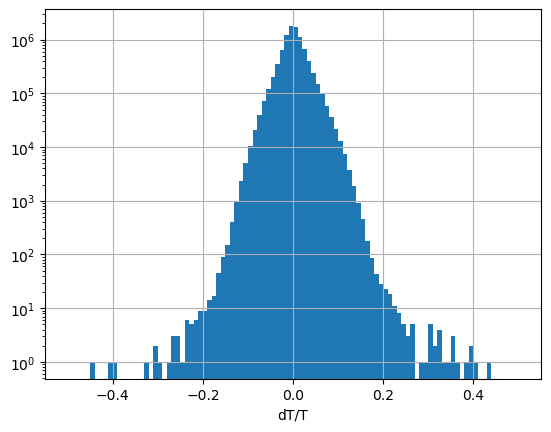

In [32]:
mplot.hist(dT/model_T, range=(-0.5,0.5), bins=100)
mplot.grid()
mplot.yscale('log')
mplot.xlabel('dT/T')

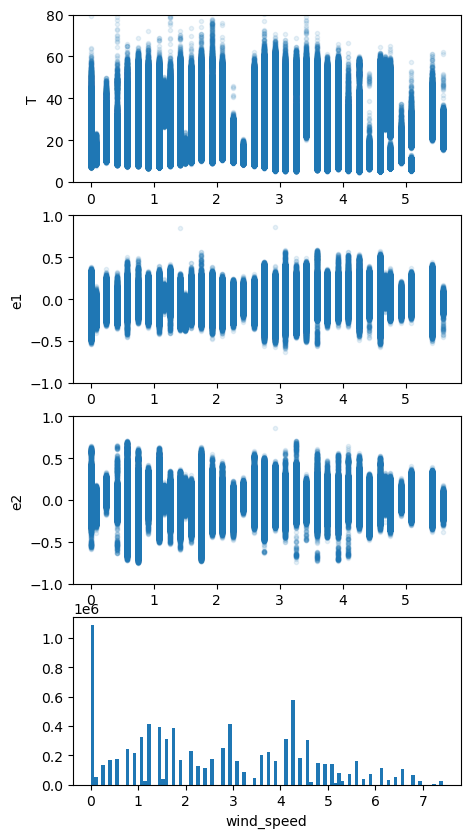

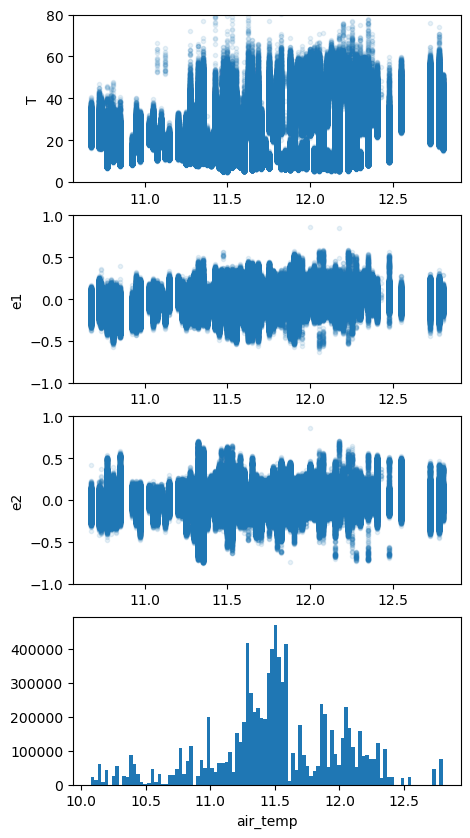

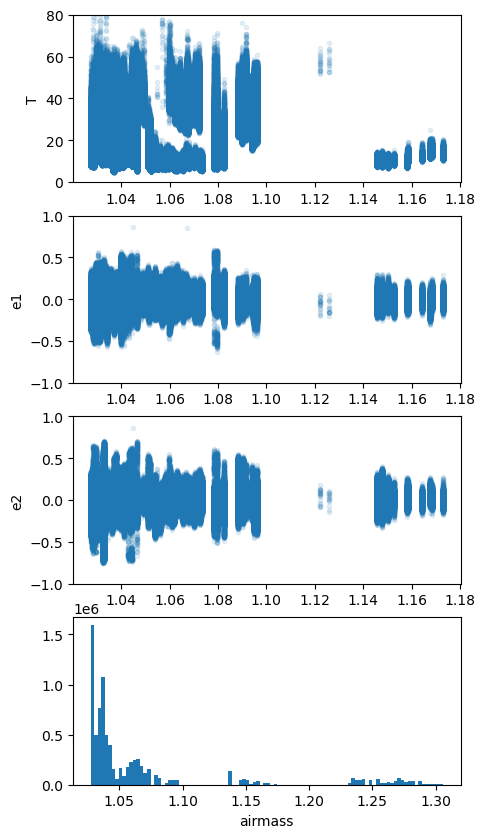

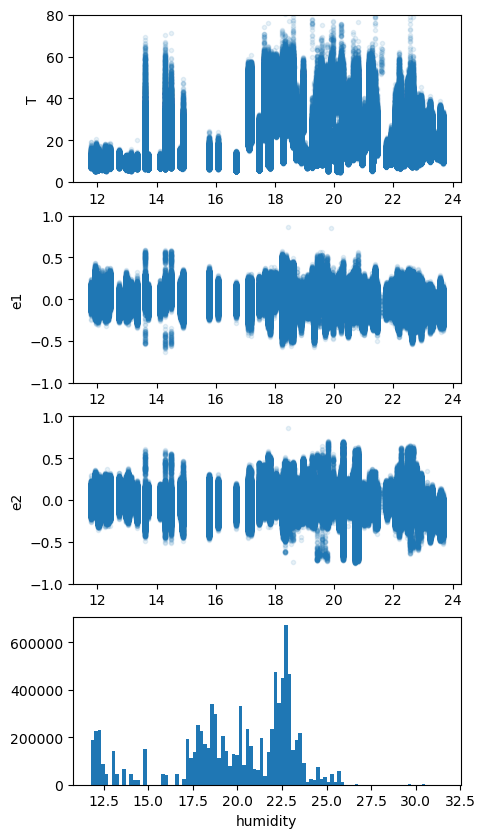

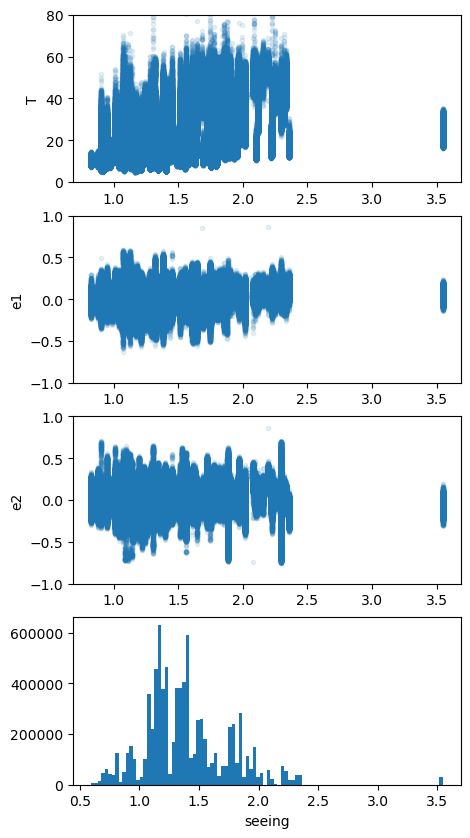

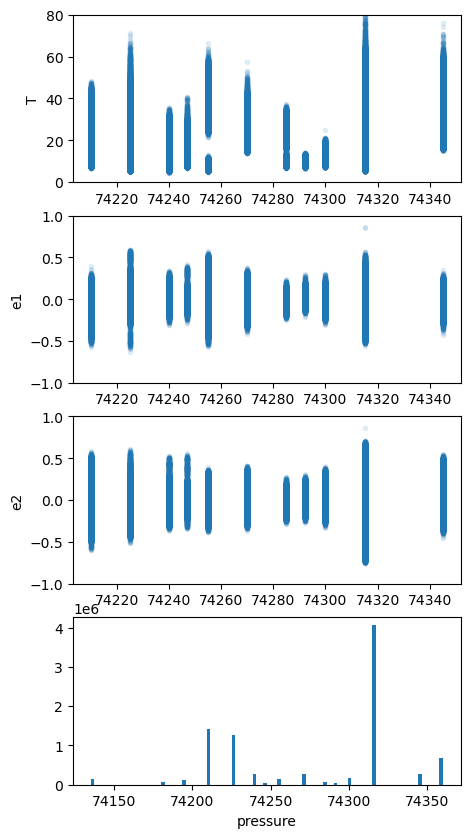

In [9]:
fieldX_mask = (ra>213)*(21<219)*(dec>-19)*(dec<-14)

for i in range(6):

    mplot.figure(figsize=(5,10))
    
    mplot.subplot(411)
    mplot.scatter(X[i][fieldX_mask], T[fieldX_mask], marker='.',alpha=0.1)
    mplot.ylim(0,80)
    mplot.ylabel('T')
    
    mplot.subplot(412)
    mplot.scatter(X[i][fieldX_mask], e1[fieldX_mask], marker='.',alpha=0.1)
    mplot.ylim(-1,1)
    mplot.ylabel('e1')
    
    mplot.subplot(413)
    mplot.scatter(X[i][fieldX_mask], e2[fieldX_mask], marker='.',alpha=0.1)
    mplot.ylim(-1,1)
    mplot.ylabel('e2')
    
    mplot.subplot(414)
    mplot.hist(X[i], bins=100)
    mplot.xlabel(XX[i])

    mplot.show()


Text(0, 0.5, 'e2')

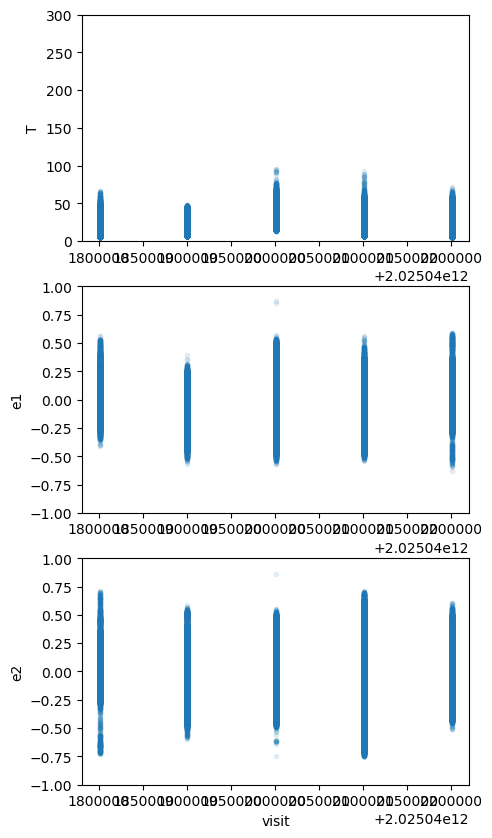

In [15]:
fieldX_mask = (ra>213)*(21<219)*(dec>-19)*(dec<-14)

mplot.figure(figsize=(5,10))

mplot.subplot(311)
mplot.scatter(visit[fieldX_mask], T[fieldX_mask], marker='.',alpha=0.1)
mplot.ylim(0,300)
mplot.ylabel('T')

mplot.subplot(312)
mplot.scatter(visit[fieldX_mask], e1[fieldX_mask], marker='.',alpha=0.1)
mplot.ylim(-1,1)
mplot.ylabel('e1')

mplot.subplot(313)
mplot.scatter(visit[fieldX_mask], e2[fieldX_mask], marker='.',alpha=0.1)
mplot.ylim(-1,1)
mplot.xlabel('visit')
mplot.ylabel('e2')

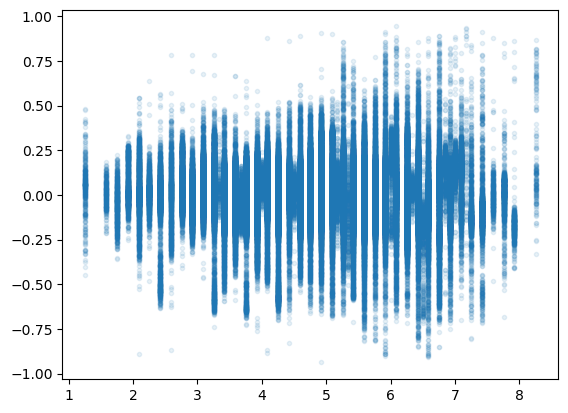

In [44]:
mplot.scatter(wind_speed[::100], e2[::100], marker='.',alpha=0.1)

Text(0, 0.5, 'dec')

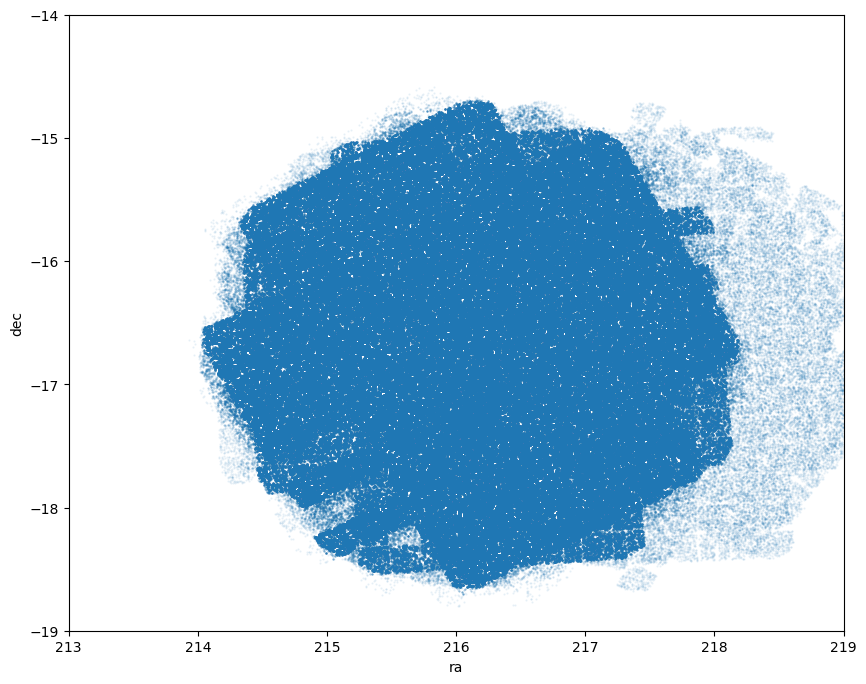

In [4]:
mplot.figure(figsize=(10,8))
mplot.scatter(ra, dec, marker='.', s=1, alpha=0.1)
mplot.xlim(213,219)
mplot.ylim(-19,-14)
mplot.xlabel('ra')
mplot.ylabel('dec')

Text(0, 0.5, 'dec')

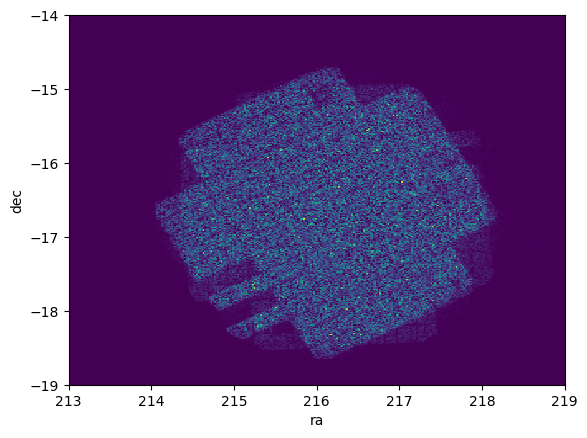

In [100]:
mplot.hist2d(ra, dec, bins=300, range=((213,219),(-19,-14)))
mplot.xlabel('ra')
mplot.ylabel('dec')

In [ ]:
# 2pt functions

